## Step 1 - Preparing Data 


##### Step Info!

  - Pada Step Ini Adalah Penyiapan Data Untuk Disimpan Dalam Bentuk Cell (Array)
  - Hal Ini Dilakukan Untuk Mempermudah Pengolahan Data Pada Step Selanjutnya

In [1]:
""" Importing Lib Yang Dibutuhkan """

import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


##### Step Info!

  - Menyiapkan Target Dari Target Data (Y Data)
  - **ActionFor5000Data.npy** berada pada folder initial data, file ini memiliki struktur array 1 dimensi yang merepresentasikan tiap target dari file citra awal yang ada pada folder **logs_bird**
  - Contoh DataTarget = [0,1,0,0] yang kemudian di proses dengan **One_Hot_Encoding** untuk menghasilkan DataOneHot = [[1,0],[0,1],[1,0],[1,0]]

In [4]:
""" Encoding Dan Simpan File Untuk Action One Hot Baru """

action = np.load("../initial_data/ActionFor5000Data.npy")
actonehot = to_categorical(action)
np.save("../initial_data/DataY",np.array(actonehot))

print('Original label:\n', action[5:9])
print('After conversion to one-hot:\n', actonehot[5:9])

""" Akhir Konversi """


Original label:
 [0 1 1 0]
After conversion to one-hot:
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


' Akhir Konversi '

##### Step Info!

  - Membuat Template Staking Dari Gambar Sample Pada Folder
  - Mengapa saya harus menumpuk 4 frame bersamaan? Ini adalah salah satu cara bagi model untuk dapat menyimpulkan informasi posisi burung.

In [24]:
""" Get Sample For Staking """

samplefile = "../logs_bird/sample.png";
x_t = cv2.imread(samplefile, cv2.IMREAD_COLOR)
x_t = cv2.cvtColor(cv2.resize(x_t, (80, 80)), cv2.COLOR_BGR2GRAY)
ret, x_t = cv2.threshold(x_t,1,255,cv2.THRESH_BINARY)
s_t = np.stack((x_t, x_t, x_t, x_t), axis=2)

print('Size Before Staking:\n', x_t.shape)
print('Size After  Staking :\n', s_t.shape)

""" End For Sample Staking """

Size Before Staking:
 (80, 80)
Size After  Staking :
 (80, 80, 4)


' End For Sample Staking '

##### Step Info!

  - Pertama-tama mengubah gambar warna menjadi skala abu-abu
  - Memotong ukuran gambar menjadi 80x80 piksel
  - Menumpuk 4 frame bersama sebelum diproses pada CNN

In [25]:
""" Preparing Data """

DataX = []
for i in range(5000):
    foldername = "../logs_bird/";
    filename = foldername+"frame"+str(i)+".png"
    img = cv2.imread(str(filename), cv2.IMREAD_COLOR)
    x_t1 = cv2.cvtColor(cv2.resize(img, (80, 80)), cv2.COLOR_BGR2GRAY)
    ret, x_t1 = cv2.threshold(x_t1, 1, 255, cv2.THRESH_BINARY)
    x_t1 = np.reshape(x_t1, (80, 80, 1))
    s_t1 = np.append(x_t1, s_t[:, :, :3], axis=2)
    
    DataX.append(s_t1)
np.save("../initial_data/DataX",np.array(DataX))


""" End For Preparing Data """

' End For Preparing Data '

##### Prosess Info!

  - Pertama-tama mengubah gambar warna menjadi skala abu-abu
  - Memotong ukuran gambar menjadi 80x80 piksel
  - Menumpuk 4 frame bersama sebelum diproses pada CNN

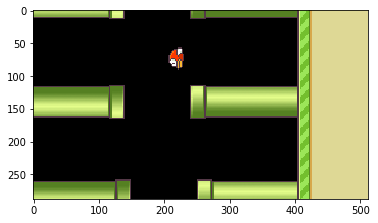

In [26]:
""" Mencoba Dengan Data Sample Terhakir """
foldername = "../logs_bird/";
filename = foldername+"frame4999.png"
img = cv2.imread(str(filename), cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()


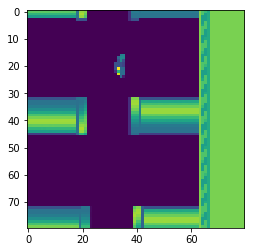

In [27]:
""" Mengubah gambar warna menjadi skala abu-abu Dan Croping jadi 80x80"""
x_t1 = cv2.cvtColor(cv2.resize(img, (80, 80)), cv2.COLOR_BGR2GRAY)
plt.imshow(x_t1)
plt.show()

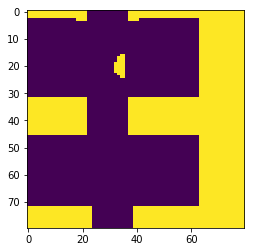

In [28]:
""" Merubah Menjadi Biner Sebelum Proses Staking """
ret, x_t1 = cv2.threshold(x_t1, 1, 255, cv2.THRESH_BINARY)
plt.imshow(x_t1)
plt.show()

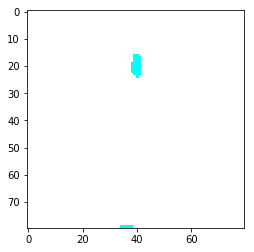

In [29]:
""" Proses Staking 4 Frame """
x_t1 = np.reshape(x_t1, (80, 80, 1))
s_t1 = np.append(x_t1, s_t[:, :, :3], axis=2)
plt.imshow(s_t1)
plt.show()